In [1]:
import pcamlib as pc

import pandas as pd
import tensorflow as tf

In [2]:
pcam, pcam_info = pc.load_pcam()

tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_path='/Users/jaredlauer/tensorflow_datasets/patch_camelyon/2.0.0',
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable

In [3]:
train_pipeline, valid_pipeline, test_pipeline = pc.build_pipelines(pcam)

In [4]:
cnn = tf.keras.models.load_model("cnn1")
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
dropout_16 (Dropout)         (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 92, 92, 16)        2320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 92, 92, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
dropout_18 (Dropout)         (None, 44, 44, 32)       

In [5]:
hist_df = pc.load_history('cnn1_history.csv')
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.364252,0.841896,0.407204,0.819641
1,0.312996,0.868130,0.344373,0.846527
2,0.287698,0.881626,0.409219,0.813843
3,0.270997,0.888927,0.349196,0.840790
4,0.255480,0.896851,0.304264,0.863831
5,0.245907,0.901691,0.317085,0.858337
6,0.238003,0.905781,0.301543,0.868042
7,0.231203,0.908474,0.295298,0.869415


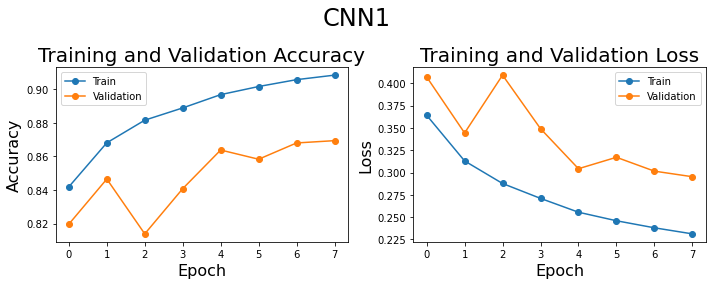

In [6]:
pc.plot_history(hist_df, title='CNN1')

In [8]:
%%time
pc.print_test_accuracy(cnn, test_pipeline)

Test set accuracy is 0.8441


In [5]:
%%time
y_proba = pc.generate_y_proba(cnn, test_pipeline, class_1=False, save=True, filepath='y_proba/cnn1_y_proba.csv')

CPU times: user 3min 43s, sys: 20.1 s, total: 4min 3s
Wall time: 45.3 s


In [2]:
y_proba = pc.load_y_proba('data/y_proba/cnn1_y_proba.csv')
y_proba


array([[0.8328406 , 0.16715938],
       [0.11837599, 0.881624  ],
       [0.7755397 , 0.2244603 ],
       ...,
       [0.00129417, 0.99870586],
       [0.00353872, 0.99646133],
       [0.9566493 , 0.0433507 ]])

In [11]:
%%time
y_true = pc.generate_y_true(pcam)

CPU times: user 23.6 s, sys: 2.13 s, total: 25.8 s
Wall time: 5.63 s


In [20]:
%%time
y_pred = pc.generate_y_pred(y_proba)

CPU times: user 7.96 ms, sys: 1.42 ms, total: 9.38 ms
Wall time: 9.38 ms


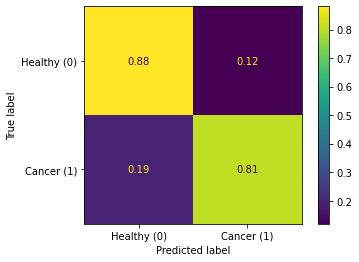

In [23]:
pc.plot_cf_matrix(y_true, y_pred, normalize=True)

In [10]:
pc.plot_roc_curve(y_true, y_proba)

NameError: name 'y_true' is not defined